In [1]:
import pandas as pd

import numpy as np

import plotly.express as px

import matplotlib.pyplot as plt

import seaborn as sns

import statistics

In [2]:
data = pd.read_csv(r"C:\Users\msaid\Desktop\Projects\Kaggle_Sign_Language_Database\sign_mnist_train.csv")

data.head(4)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  

[4 rows x 785 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

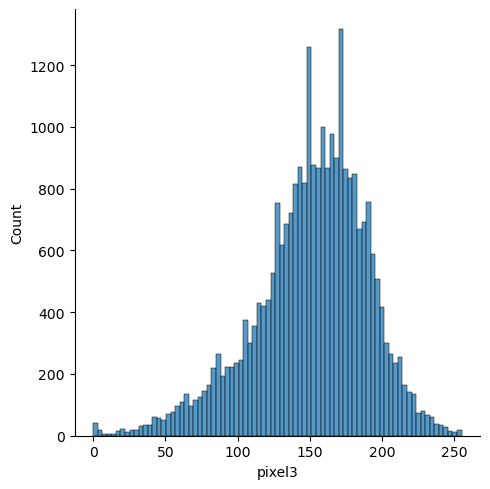

In [3]:
sns.displot(data["pixel"])
plt.show

In [6]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Violin(y=data['pixel1'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='#3f7896', opacity=0.6,
                               x0='Histogram'))

fig.update_layout(yaxis_zeroline=False)
fig.show()

In [32]:
fig = px.density_heatmap(data, x="pixel53", y="pixel29")
fig.show()

In [35]:
#Machine Learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load the sign language dataset
data = pd.read_csv(r"C:\Users\msaid\Desktop\Projects\Kaggle_Sign_Language_Database\sign_mnist_train.csv")

# Split the dataset into training and testing sets
X = data.drop('label', axis=1).values
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors classifier on the training set
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluate the accuracy of the classifier on the testing set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



# Load a new dataset to make predictions on (e.g. sign_mnist_test.csv)
new_data = pd.read_csv(r"C:\Users\msaid\Desktop\Projects\Kaggle_Sign_Language_Database\sign_mnist_test.csv")

# Split the new dataset into features (X) and labels (y)
X_new = new_data.drop('label', axis=1).values
y_new = new_data['label'].values

# Use the trained KNN classifier to make predictions on the new data
y_pred_new = knn.predict(X_new)

# Evaluate the accuracy of the predictions on the new data
accuracy_new = accuracy_score(y_new, y_pred_new)
print(f"Accuracy on new data: {accuracy_new:.2f}")

Accuracy: 1.00
Accuracy on new data: 0.81


In [37]:
data.corr()["pixel75"]

label       0.067808
pixel1      0.512605
pixel2      0.534586
pixel3      0.559187
pixel4      0.574865
              ...   
pixel780    0.168728
pixel781    0.173891
pixel782    0.175607
pixel783    0.169435
pixel784    0.172069
Name: pixel75, Length: 785, dtype: float64

In [16]:
import numpy as np

standard_deviation = data["pixel2"].apply(lambda x : (x - data["pixel2"].mean())/np.std(data["pixel2"]))

pixel2 = "pixel2"
print(f"This is the standard deviation of the column {pixel2}: {standard_deviation}")
print(f"This is the average {standard_deviation.mean()}")
print(f"This is the range of the standard deviation {standard_deviation.max()-standard_deviation.min()}")

This is the standard deviation of the column pixel2: 0       -0.763625
1        0.212805
2        0.988941
3        1.564785
4        0.463171
           ...   
27450    1.013978
27451    0.137695
27452    0.638428
27453    0.813685
27454    0.788648
Name: pixel2, Length: 27455, dtype: float64
This is the average 2.5802626390559823e-16
This is the range of the standard deviation 6.384349104580316


In [ ]:
data["pixel248"].hist()

In [31]:
fig = px.scatter(data, x="pixel84", y="pixel175", color="pixel124", marginal_y="violin",
           marginal_x="box", trendline="ols", template="plotly_dark")
fig.show()

In [22]:
print(data.isnull().sum())
# No null numbers!

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [8]:
num_columns = data.shape[1]

print(f"The number of columns in the DataFrame is: {num_columns}")

The number of columns in the DataFrame is: 785


In [20]:
# Load the new data
new_data = pd.read_csv(r"C:\Users\msaid\Desktop\Projects\Kaggle_Sign_Language_Database\sign_mnist_test.csv")

# Remove the feature names
new_data = new_data.drop('label', axis=1).values

# Make predictions on the new data
y_pred = knn.predict(new_data)

# Print the predictions
print(y_pred)

[ 6  5 21 ...  2  4  2]


In [30]:
# Load the new data
new_data = pd.read_csv(r"C:\Users\msaid\Desktop\Projects\Kaggle_Sign_Language_Database\sign_mnist_test.csv")

# Split the new data into features and labels
X_new = new_data.drop('label', axis=1).values
y_new = new_data['label'].values

# Make predictions on the new data
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions:", y_pred)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_new, y_pred)
print("Accuracy:", accuracy) #Accuracy of new data


Predictions: [ 6  5 21 ...  2  4  2]
Accuracy: 0.7967094255437813
